<a href="https://colab.research.google.com/github/rohanroney/email-campaign-effectiveness-prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'blue'><b>Email Campaign Effectiveness Prediction

##<font color = 'blue'> <b>Problem Statement</b>
<font color = 'blue'>Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.



In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Path of data in drive
data_path='/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone Project II/data_email_campaign.csv'
#Reading csv file
email_data=pd.read_csv(data_path)

In [ ]:
#Data
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


###<font color = 'blue'>The data has the following features:

<font color = 'blue'><b>Email_ID</b> - This column contains the email ids of individuals.

<font color = 'blue'><b>Email_type</b> - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

<font color = 'blue'><b>Subject_Hotness_Score</b> - It is the subject-line effectiveness score.

<font color = 'blue'><b>Email_Source</b> - It represents the source of the email like sales,marketing or product type email.

<font color = 'blue'><b>Email_Campaign_Type</b> - Campaign type

<font color = 'blue'><b>Total_Past_Communications</b> - This column contains the previous mails from the  source.

<font color = 'blue'><b>Customer_Location</b> - Categorical data which explains the different demographic location of the customers.  

<font color = 'blue'><b>Time_Email_sent_Category</b> - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

<font color = 'blue'><b>Word_Count</b> - It contains the no.of words in the mail.

<font color = 'blue'><b>Total_Links</b> - Total links in the email body.

<font color = 'blue'><font color = 'blue'><b>Total_Images</b> - The banner images in the email body.

<font color = 'blue'><b>Email_Status</b> - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

##<font color = 'blue'> <b>Exploratory Data Analysis</b>


In [ ]:
#Retreiving Column names
email_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#getting the shape of dataset
email_data.shape

(68353, 12)

In [ ]:
#Check for any duplicates data
email_data.duplicated().sum()

0

<font color='blue'> Hence, we can observe that there are no duplications of data.

In [ ]:
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<font color='blue'> From the above data we realise that 4 features have null values. Will be handling it in the upcoming Data Cleaning  section.

##<font color = 'blue'> <b>Analysis of Categorical data</b>


In [ ]:
#creating new dataframe of only categorical columns
ds_cat = email_data.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head(2)

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0


In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [ds_cat[c].unique()]
    tmp['Total Count'] = len(list(ds_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(ds_cat[c].nunique())
    tmp['Missing Value'] = ds_cat[c].isnull().sum()
    tmp['Missing %'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


*   <font color='blue'>As we can see we have 17% missing values in <b>Customer Location</b>.

*   <font color='blue'>There is no missing values in any other categorical variable.


*  <font color='blue'><b>Email_Type</b> and <b>Email_Source_Type</b> have 2 categories.

*   <font color='blue'><b>Email_Campaign_Type,Time_Email_sent_Category and Email_Status</b> have 3 Categories
*   <font color='blue'>Look at the Variable <b>'Customer_Location'</b> -- distinct categories are 8 but without nans it is 7.









#### <font color='blue'> Since we are working on a Multi-Class Classification problem we should also look at the relationship between the dependent variable and independent variable.

In [ ]:
#Dropping Email_ID column
ds_cat.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPerc(df,xVar,ax):
    ''' barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

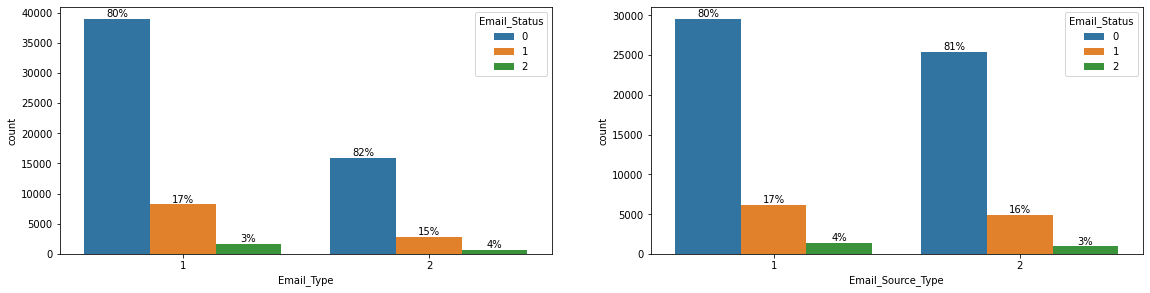

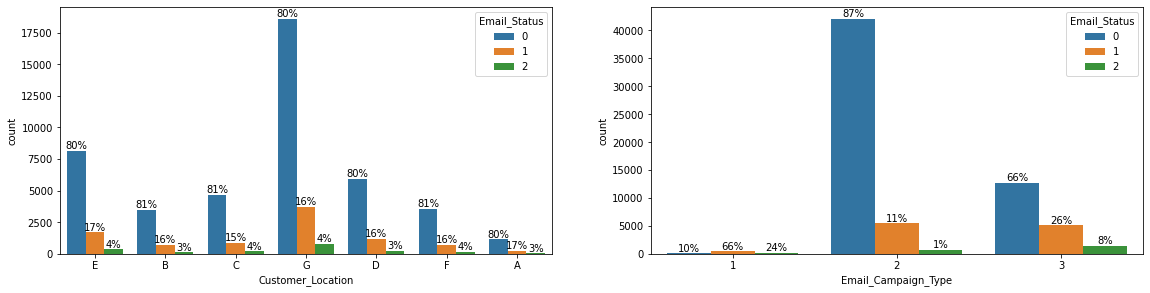

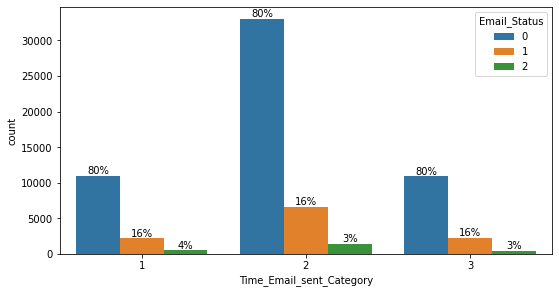

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(ds_cat.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = ds_cat, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(ds_cat,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

<font color='blue'> As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.

##<font color = 'blue'> <b>Analysis of Numerical Data</b>


In [ ]:
#creating new dataframe of only numerical columns
ds_num = email_data.select_dtypes(include =['float']).copy()
ds_num['Word_Count'] = email_data.loc[ds_num.index, 'Word_Count'].copy()
ds_num.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504


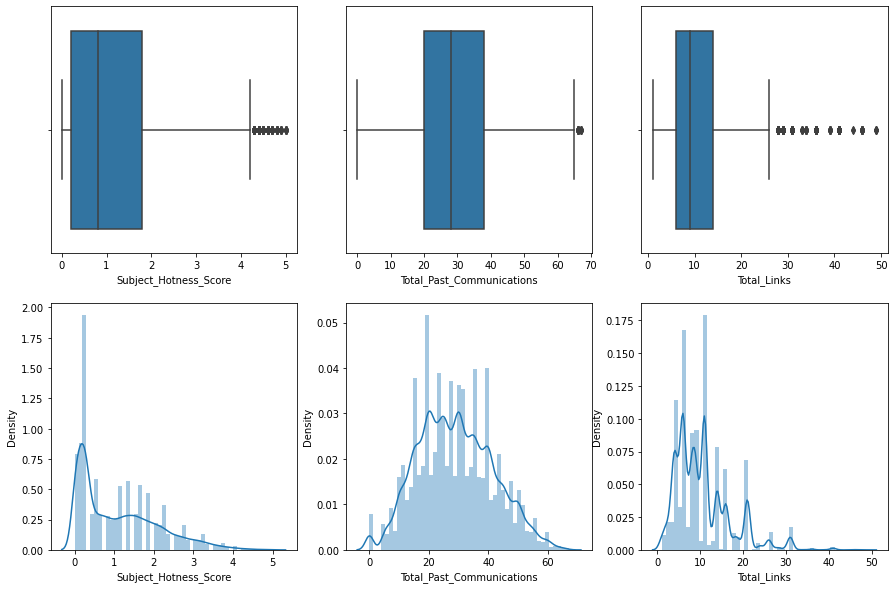

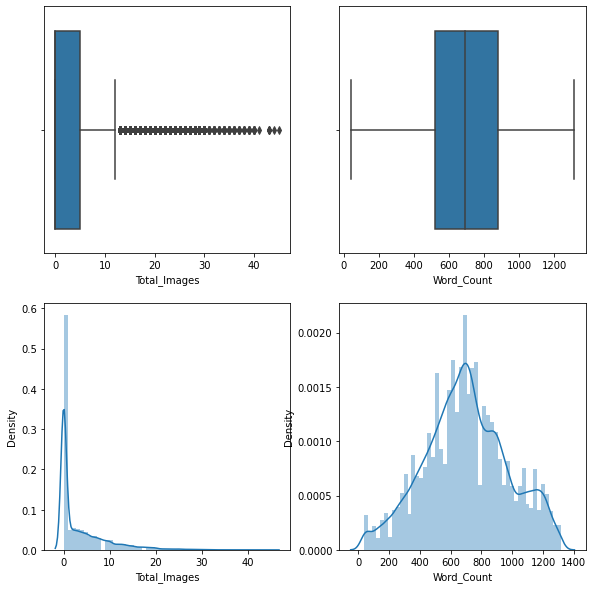

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = ds_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(ds_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

<font color='blue'>There are <b> outliers </b> in <b>Subject_Hotness_Score</b>,<b>Total_Links </b>and <b>Total_Images</b> and the distribution of these features are <b>right skewed</b> in nature. There are also a few outliers in Total_Past_Communication which has a <b>normal distribution </b>.<br>


####<font color ='blue'> **Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.**

In [ ]:
ds_num['Email_Status'] = email_data.loc[ds_num.index, 'Email_Status'].copy()

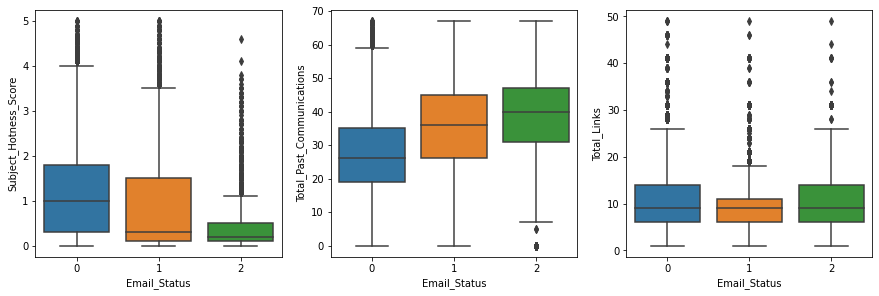

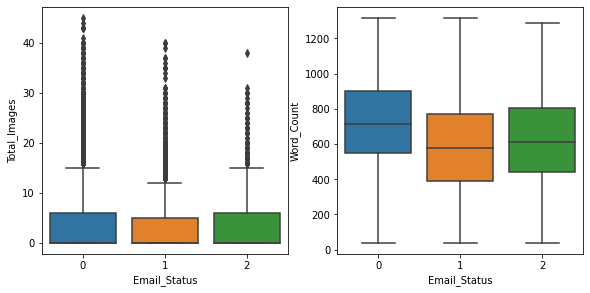

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=ds_num, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1




*   <font color='blue'>**Subject_Hotness_Score** -> All Email_Status i.e 0,1,2 have **outliers**. 0 have highest median and 1,2 are **right skewed**. It is observed that the <b>Subject_Hotness_Score</b> for read/acknowledged mails are much lower.

*   <font color='blue'>**Total_Past_Communications** -> 0,2 have **outliers** and 2 have highest median .

*   <font color='blue'>**Total_Links** ->0,1,2 all have **outliers**,All have the same median but 0,2 have higher variance compare to 1.
*   <font color='blue'>**Total_Images** ->0,1,2 all have **outliers** and All have the same median. Hence all the mails have the same range of images.


*  <font color='blue'>**Word_Count** ->Median of 0 is highest. Thus we can understand that ignored mails have higher word count.





####<font color='blue'> Lets see the correlation of numerical variables

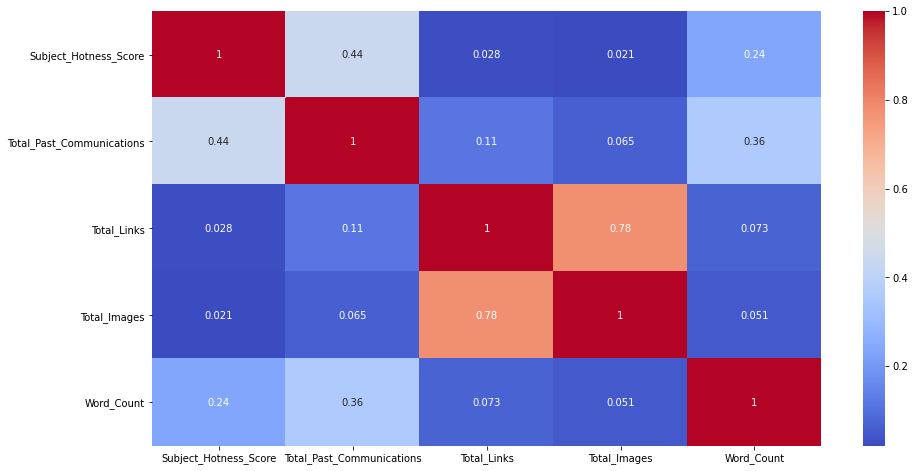

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = ds_num.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

<font color = 'blue'>We can observe that there is a relationship between <b>Total_Images</b> and <b>Total_Links</b>, they have <b>78% positive correlation</b>. To understand if this relation holds true, we try and validate with a lmplot b/w the two features.

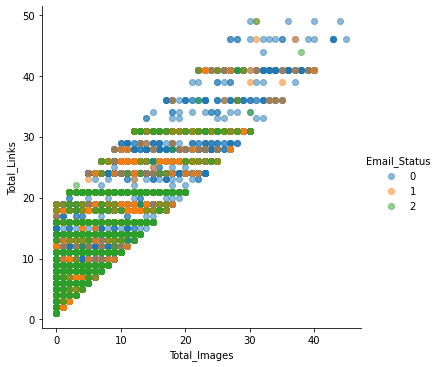

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=email_data, fit_reg=False, scatter_kws={'alpha':0.5})

<font color = 'blue'>We can conclude from the above information that there is a high positive correlation between these two features. Lets now understand each feature individually.

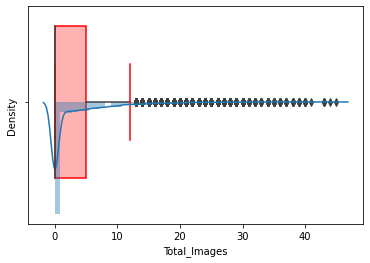

In [ ]:
ax=sns.boxplot(ds_num['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Images'])


<font color='blue'><b>More than 50%  of values are 0 and there are there is a presence of outliers in Total_Images

In [ ]:
#Finding number of data having 0 images
img_cnt_0=ds_num[ds_num['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=ds_num['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)

Percentage of data having Total_Images Zero is =  52.58263843061971


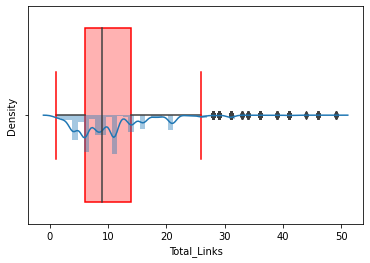

In [ ]:
ax=sns.boxplot(ds_num['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Links'])


<font color='blue'> Compared to <b>Total_Images</b>, <b>Total_Links</b> has very few outliers.
<br>
<font color='blue'>Since images and links are correlated and most of the values in <b>Total_Images</b> is 0 we will combine both the features.<br>
<font color='blue'>Before that we need to see if there is any null values in this column . 

In [ ]:
# Number of NaNs for each object
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<font color='blue'>Since there are null values we need to impute them individually after that we <b>can combine Total_Links and Total_Images</b>

##<font color = 'blue'> <b>Null Value Imputation</b>


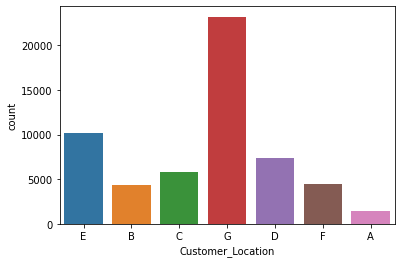

In [ ]:
#Visualizing Customer_Location
sns.countplot(email_data['Customer_Location'])

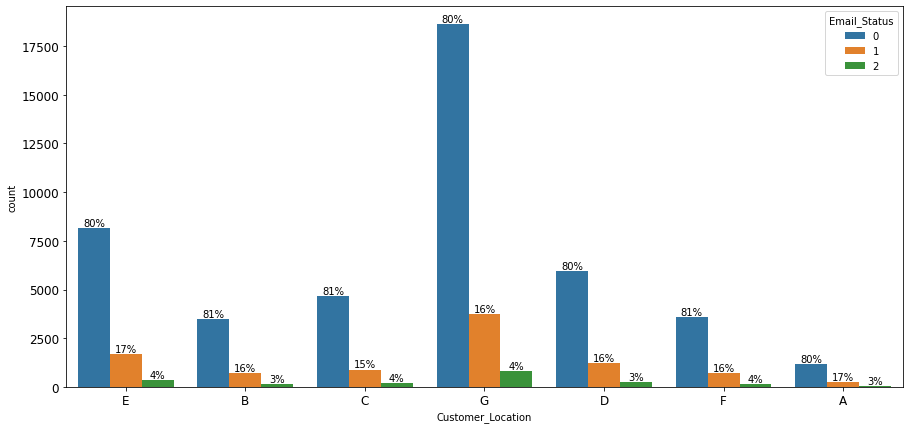

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(email_data['Customer_Location'],hue=email_data['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(email_data,'Customer_Location',ax)

<font color='blue'>As we can see irrespective of location the ratio of <b>Email_Status</b> is same throughout .So <b>we can drop the location column

In [ ]:
'''
print('Shape of data before dropping ',email_data.shape)
#dropping Customer_Location column
email_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)
'''

"\nprint('Shape of data before dropping ',email_data.shape)\n#dropping Customer_Location column\nemail_data.drop('Customer_Location',inplace=True,axis=1)\nprint('Shape of data after dropping ',email_data.shape)\n"

<font color='blue'> Lets find out which metrics we should use to fill missing values of Total_Past_Communications column

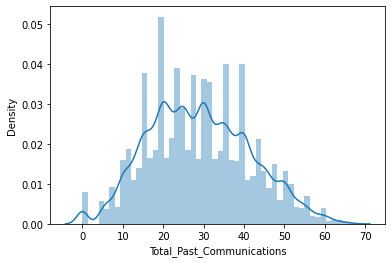

In [ ]:
sns.distplot(email_data.Total_Past_Communications)

<font color='blue'> As we can observe the data is symmetricaly distributed so <b>we can use mean value</b> for imputing missing values

In [ ]:
print('Number of missing values before imputing is = ',email_data['Total_Past_Communications'].isnull().sum())
email_data['Total_Past_Communications'].fillna(email_data['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


<font color='blue'> Now lets find out which metrics we should use to fill missing values of Total_Links column





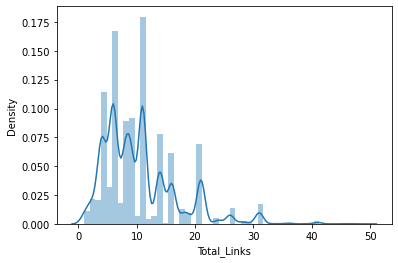

In [ ]:
sns.distplot(email_data.Total_Links)

<font color='blue'> Since the data is not normally distributed <b>we will use Mode</b> to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Links'].isnull().sum())
email_data['Total_Links'].fillna(email_data['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Links'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


<font color='blue'> Now lets find out which metrics we should use to fill missing values of Total_Images column

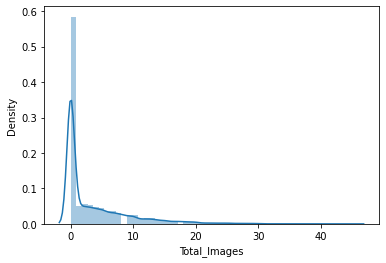

In [ ]:
sns.distplot(email_data.Total_Images)

<font color='blue'> Since the data is not normally distributed <b>we will use Mode </b> to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Images'].isnull().sum())
email_data['Total_Images'].fillna(email_data['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Images'].isnull().sum())

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

#### <font color='blue'> Now we have no missing values, So we can combine Links and Images column into one.

In [ ]:
email_data['Links_Images']=email_data['Total_Links']+email_data['Total_Images']

In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_data.shape)
email_data.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 13)
Shape of data after dropping  (68353, 11)


##<font color = 'blue'> <b>Feature Engineering</b>



<font color='blue'> Lets understand the <b>multicollinearity</b> within the numerical featrures.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(email_data[[i for i in email_data.describe().columns if i not in ['Email_ID','Customer_Location','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


<font color='blue'>Here, the VIF is within acceptable limits i.e. VIF<5 . Hence multicollinearity is not a major issue for our data.

##<font color = 'blue'> <b>Outlier Treatment</b>


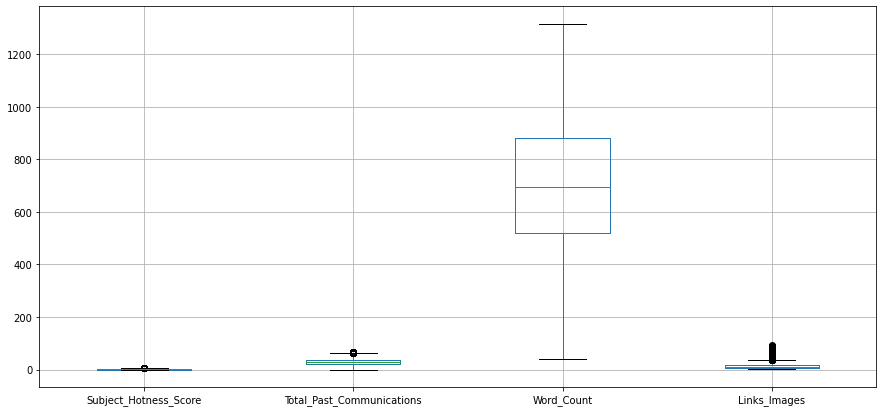

In [ ]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
email_data.boxplot(numerical_col)


<font color='blue'> Except Word_Count column all other numeric column have outliers. Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


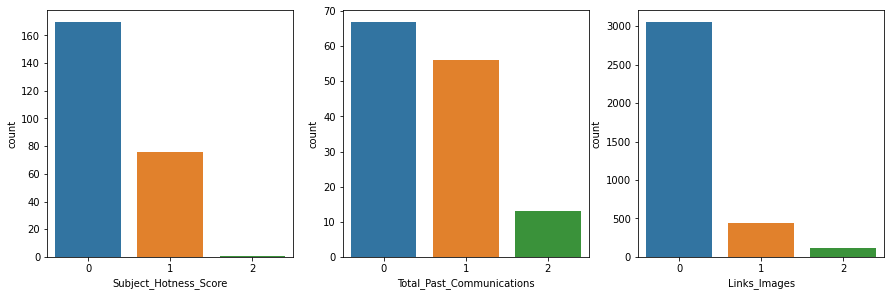

In [ ]:
#removing Word_Count because it does'nt have outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q75,q25 = np.percentile(email_data.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=email_data.loc[email_data[x] < min]['Email_Status'].tolist()
    y.append(email_data.loc[email_data[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)
  

In [ ]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=email_data.groupby('Email_Status').count()['Email_Type'][1]+email_data.groupby('Email_Status').count()['Email_Type'][2]
total_0=email_data.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


#### <font color = 'blue'>Since more than 5% of minority classes will be removed if we delete outliers and we don't want that so we will keep it as it is.

In [ ]:
#Dropping Email_ID column
print('Shape of data before dropping ',email_data.shape)
email_data.drop('Email_ID',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 11)
Shape of data after dropping  (68353, 10)


<font color='blue'> Now we are done with outlier treatment and missing value imputation lets move on to our dependent variable

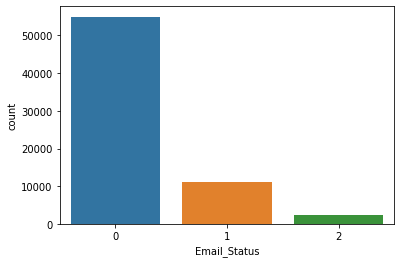

In [ ]:
sns.countplot(email_data['Email_Status'])

In [ ]:
email_data.groupby('Email_Status').count()['Email_Type']

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

####<font color='blue'><b> Dependent variable is highly imbalanced </b> . Before treating that lets normalize our data

##<font color = 'blue'> <b>Feature Normalization</b>


In [ ]:
# apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
    email_data[column] = (email_data[column] - email_data[column].min()) / (email_data[column].max() - email_data[column].min()) 

In [ ]:
email_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,E,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,NaN,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,B,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,E,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,C,3,0.268657,2,0.710815,0,0.032609


<font color='blue'>Lets visualize our normalized data

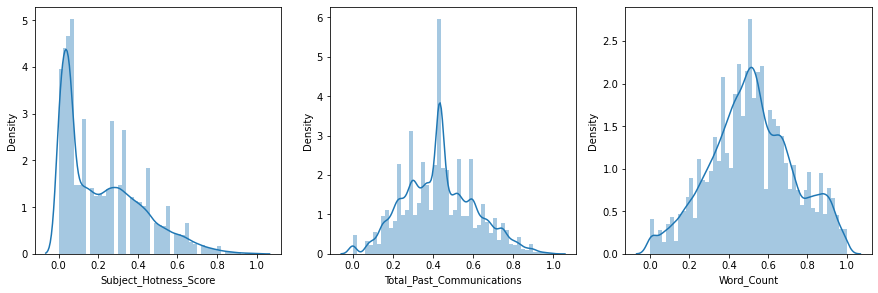

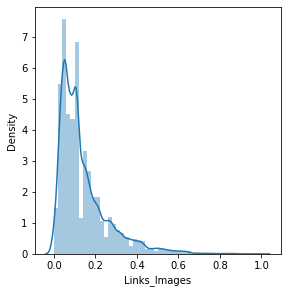

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in numerical_col:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_data[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1




#### <font color='blue'>Now we are done with scaling ,it's time to perform one-hot encoding on our categorical data.

#<font color='blue'>**One hot encoding**

In [ ]:
email_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,E,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,NaN,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,B,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,E,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,C,3,0.268657,2,0.710815,0,0.032609


In [ ]:
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Customer_Location']
email_data=pd.get_dummies(email_data, columns=cat_col)
email_data.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_data.drop('Email_Source_Type_2',axis=1,inplace=True)

In [ ]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(email_data.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_data=email_data[list_of_col]
email_data.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


#<font color='blue'>**Feature Importance**

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))


In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0
Customer_Location_A : -0.00025199999999991896
Customer_Location_B : -0.0005920000000000369
Customer_Location_C : -0.000496000000000052
Customer_Location_D : -0.0007840000000000069
Customer_Location_E : -0.0005330000000000057
Customer_Location_F : -0.00048000000000003595
Customer_Location_G : -0.00035600000000002296


Text(0.5, 1.0, 'Feature Importance')

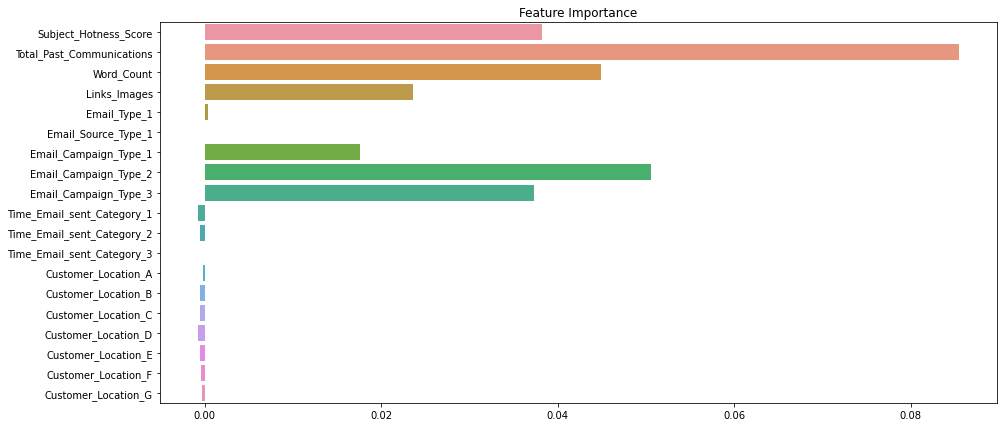

In [ ]:
info_gain={}
for feature in email_data.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_data, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

<font color='blue'>We can observe that Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3 and Customer_Location have very less importance we can drop this feature.

In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3',
      'Customer_Location_A','Customer_Location_B','Customer_Location_C','Customer_Location_D',
      'Customer_Location_E','Customer_Location_F','Customer_Location_G']
email_data.drop(drop,inplace=True,axis=1)

In [ ]:
email_data.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.31348,0.076087,1,0,0,1,0,0


### <font color='blue'>Now we are done with feature selection lets move to data imbalance handling.

##<font color='blue'>**Imbalance Handling**

###<font color='blue'><b>Random Under Sampling</b><br>
<font color='blue'>Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

<font color='blue'>Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(email_data.iloc[:,0:-1], email_data['Email_Status'])

print('Original dataset shape:', len(email_data))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 68353
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

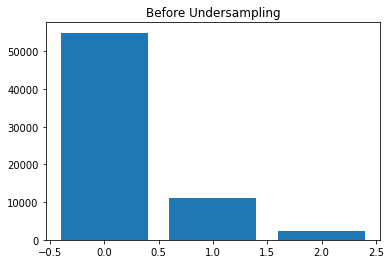

In [ ]:
plt.bar(Counter(email_data['Email_Status']).keys(), Counter(email_data['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

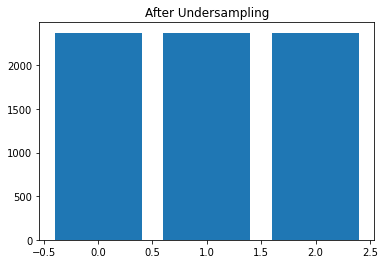

In [ ]:
plt.bar(Counter(y_rus).keys(), Counter(y_rus).values())
plt.title("After Undersampling")

In [ ]:
unique_elements, counts_elements = np.unique(y_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[   0    1    2]
 [2373 2373 2373]]


<font color='blue'> Now we have a <b>total balanced data with 2373 records for each class.

#<font color='blue'>**Splitting the dataset into the Training set and Test set**


In [ ]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 3,stratify=y_rus)

* <font color='blue'>Taking a 80-20 train test split.
* We need to use the stratify parameter inorder to make sure that the train and test datasets have the same ratios of the predictor variables.

#<font color='blue'>**Decision Tree Model**


In [ ]:
# Initializing the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [ ]:
# Fitting onto the train set
dt_classifier.fit(X_train_fs,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res

In [ ]:
final_list=[]

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   0 1898    1]
 [   0    4 1894]]

 Accuracy =  0.9991220368744512

 Recall =  0.9991220368744512

 Precision =  0.9991228667313098

 F1 score =  0.9991220361436879

 Roc_Auc score =  0.9999983813505406


----- Evaluation on test data -----

Confusion matrix 

[[250 134  91]
 [100 222 152]
 [110 143 222]]

 Accuracy =  0.48735955056179775

 Recall =  0.48735955056179775

 Precision =  0.4886264908514414

 F1 score =  0.4878289249247412

 Roc_Auc score =  0.6154695125390005


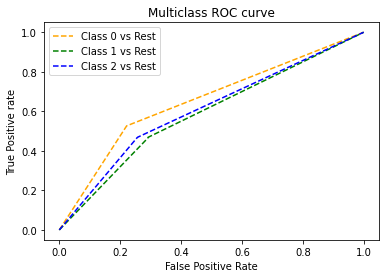

In [ ]:
# Evaluation of our decision tree model
res=evaluate(dt_classifier,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree_On_Under_Sampled_data')
final_list.append(res)

###<font color='blue'> We can observe that model is overfitting since it's performing really well on training set but not that good on unseen data. Lets find what can be the reason by implimenting other algorithm.

#<font color='blue'>**SVM Model**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)

# Fitting on the train set
svc_model.fit(X_train_fs,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

----- Evaluation on train data -----

Confusion matrix 

[[1346  188  364]
 [ 636  390  873]
 [ 333  246 1319]]

 Accuracy =  0.5364354697102721

 Recall =  0.5364354697102721

 Precision =  0.5235802182547129

 F1 score =  0.5058614584700288

 Roc_Auc score =  0.7224644157248835


----- Evaluation on test data -----

Confusion matrix 

[[326  39 110]
 [156  94 224]
 [103  63 309]]

 Accuracy =  0.511938202247191

 Recall =  0.511938202247191

 Precision =  0.5058239650387089

 F1 score =  0.48296339920933534

 Roc_Auc score =  0.7026223028459894


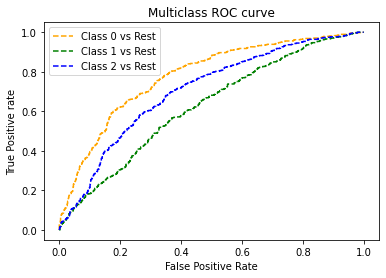

In [ ]:
# Evaluating the SVM Model
res=evaluate(svc_model,X_train_fs,y_train,X_test_fs,y_test,'SVM_On_Under_Sampled_Data')
final_list.append(res)

###<font color='blue'> So <b>SVM</b> is not overfitting and the previous model which was <b>Decision Tree</b> was overfitted because of the depth of the tree , but still SVM is not giving good results lets hypertune it to get the best parameters .

#<font color='blue'>**Hypertuning SVM Model**

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 100], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_fs, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.522, total=   5.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.536, total=   5.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.529, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   5.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   5.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.498, total=   5.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   5.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.492, total=   5.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.491, total=   5.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 100], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


----- Evaluation on train data -----

Confusion matrix 

[[1384  209  305]
 [ 619  525  755]
 [ 302  291 1305]]

 Accuracy =  0.5643546971027217

 Recall =  0.5643546971027217

 Precision =  0.5548011845756396

 F1 score =  0.5432740648547688

 Roc_Auc score =  0.7454104783027437


----- Evaluation on test data -----

Confusion matrix 

[[335  56  84]
 [147 126 201]
 [101  84 290]]

 Accuracy =  0.5273876404494382

 Recall =  0.5273876404494382

 Precision =  0.5175795043127296

 F1 score =  0.5088487157610052

 Roc_Auc score =  0.7066083353399571


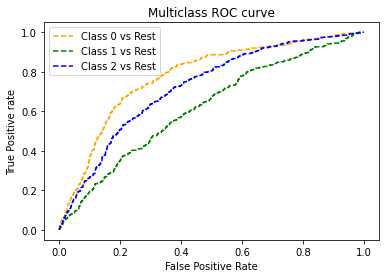

In [ ]:
# Evaluating the tuned model
res=evaluate(grid,X_train_fs,y_train,X_test_fs,y_test,'Hypertuned_SVM_On_Under_Sampled_data')
final_list.append(res)

###<font color='blue'> We get better results from previously but still it's not good , it's because of loss of information due to under sampling lets try different sampling techniques and than apply model.

# <font color='blue'>Synthetic Minority Oversampling Technique (SMOTE)

<font color='blue'>This technique generates synthetic data for the minority class.

<font color='blue'>SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

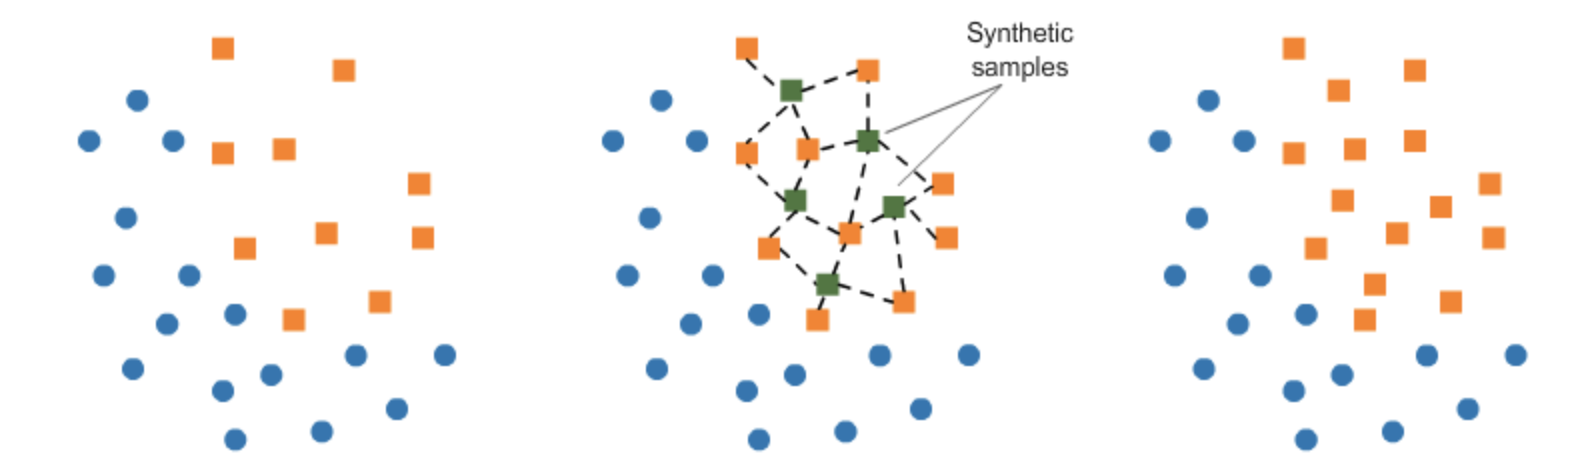

In [ ]:
email_data.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(email_data.iloc[:,0:-1], email_data['Email_Status'])

print('Original dataset shape', len(email_data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

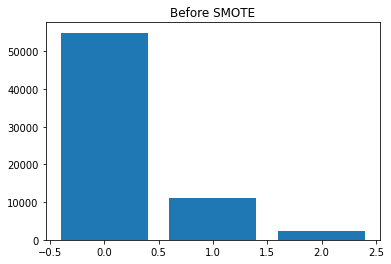

In [ ]:
plt.bar(Counter(email_data['Email_Status']).keys(), Counter(email_data['Email_Status']).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

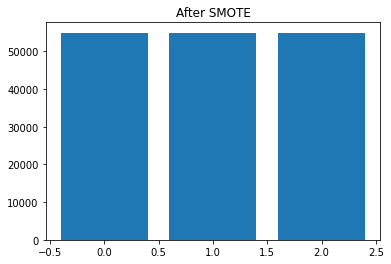

In [ ]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

In [ ]:
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[    0     1     2]
 [54941 54941 54941]]


###<font color='blue'> Now we have a <b>total balanced data with 54941 records for each class.

In [ ]:
#Split data into train and test
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify=y_smote)

### <font color='blue'>We are ready with our data lets try our baseline model Decision Tree and see the difference.

#<font color='blue'>**Decision Tree**

In [ ]:
# Fit the decision tree model
dt_classifier_smote = DecisionTreeClassifier()
dt_classifier_smote.fit(X_train_fs,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

----- Evaluation on train data -----

Confusion matrix 

[[43952     1     0]
 [  112 43840     1]
 [   32    31 43889]]

 Accuracy =  0.9986576468625339

 Recall =  0.9986576468625339

 Precision =  0.9986607296299564

 F1 score =  0.9986578614494617

 Roc_Auc score =  0.9999980084640586


----- Evaluation on test data -----

Confusion matrix 

[[8760 1788  440]
 [1509 8078 1401]
 [ 375 1189 9425]]

 Accuracy =  0.796693462763537

 Recall =  0.796693462763537

 Precision =  0.7967668487926557

 F1 score =  0.7966158637612206

 Roc_Auc score =  0.8480363239957077


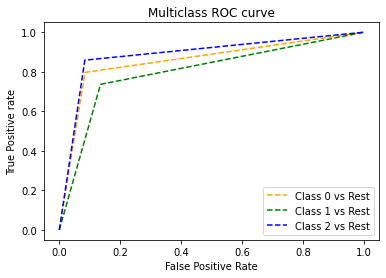

In [ ]:
# Evaluate the results
res=evaluate(dt_classifier_smote,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree')
final_list.append(res)

###<font color='blue'> We can observe the results are better on this data compare to Under Sample Data.

#<font color='blue'>**XGBoost**

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [ ]:
# Fit the model
xgb_model.fit(X_train_fs,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, min_samples_leaf=20, min_samples_split=30,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

----- Evaluation on train data -----

Confusion matrix 

[[42517  1176   260]
 [ 4374 35891  3688]
 [  756   866 42330]]

 Accuracy =  0.9156668537365954

 Recall =  0.9156668537365954

 Precision =  0.9177303329630642

 F1 score =  0.9143986822657965

 Roc_Auc score =  0.9844000748440934


----- Evaluation on test data -----

Confusion matrix 

[[10163   695   130]
 [ 1487  7755  1746]
 [  295   830  9864]]

 Accuracy =  0.8427726376459882

 Recall =  0.8427726376459882

 Precision =  0.8422295298512561

 F1 score =  0.8398451078160931

 Roc_Auc score =  0.9484660162792947


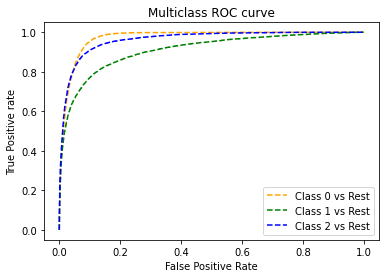

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train_fs,y_train,X_test_fs,y_test,'XGBoost')
final_list.append(res)

###<font color='blue'> We have Good F1 score for both training and testing data using XGBoost model.

#<font color='blue'> **Naive Bayes Classifier**

In [ ]:
# Importing the packages
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()
multinomial = MultinomialNB()

##<font color='blue'> 1) Gaussian

In [ ]:
# Fit the model
gausian.fit(X_train_fs,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

----- Evaluation on train data -----

Confusion matrix 

[[34655    97  9201]
 [21815   259 21879]
 [13061   362 30529]]

 Accuracy =  0.4963142168089915

 Recall =  0.4963142168089915

 Precision =  0.4515540883490676

 F1 score =  0.40025103413506996

 Roc_Auc score =  0.683631819902172


----- Evaluation on test data -----

Confusion matrix 

[[8773   31 2184]
 [5466   69 5453]
 [3283   84 7622]]

 Accuracy =  0.49943879872592145

 Recall =  0.49943879872592145

 Precision =  0.4583990271423176

 F1 score =  0.40285658021251775

 Roc_Auc score =  0.6850942791659361


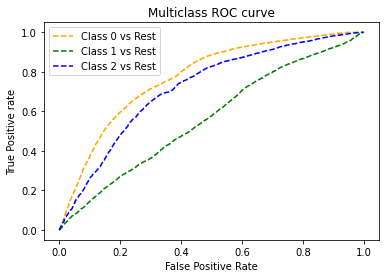

In [ ]:
# Evaluate results
res=evaluate(gausian,X_train_fs,y_train,X_test_fs,y_test,'Gaussian')
final_list.append(res)

##<font color='blue'> 2) Bernoulli

In [ ]:
# Fit model
bernoulli.fit(X_train_fs,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

----- Evaluation on train data -----

Confusion matrix 

[[33580    36 10337]
 [21657    82 22214]
 [13143    20 30789]]

 Accuracy =  0.48879097210635686

 Recall =  0.48879097210635686

 Precision =  0.5237913190107326

 F1 score =  0.391836601112983

 Roc_Auc score =  0.6399294670878065


----- Evaluation on test data -----

Confusion matrix 

[[8535   11 2442]
 [5436   29 5523]
 [3296    7 7686]]

 Accuracy =  0.4929470650690126

 Recall =  0.4929470650690126

 Precision =  0.5341332224824691

 F1 score =  0.3954801376545383

 Roc_Auc score =  0.6412641535856637


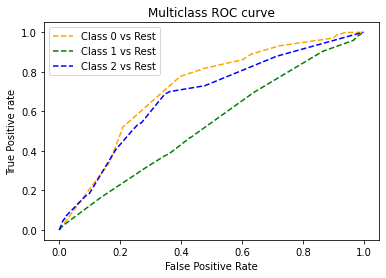

In [ ]:
# Evaluate model
res=evaluate(bernoulli,X_train_fs,y_train,X_test_fs,y_test,'Bernoulli')
final_list.append(res)

##<font color='blue'> 3) Multinomial

In [ ]:
# Fit the train set
multinomial.fit(X_train_fs,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

----- Evaluation on train data -----

Confusion matrix 

[[33580     0 10373]
 [21657     0 22296]
 [13143     0 30809]]

 Accuracy =  0.48832076931244217

 Recall =  0.48832076931244217

 Precision =  0.325474960136746

 F1 score =  0.3904750971089535

 Roc_Auc score =  0.6782325250798462


----- Evaluation on test data -----

Confusion matrix 

[[8535    0 2453]
 [5436    0 5552]
 [3296    0 7693]]

 Accuracy =  0.49227969058091914

 Recall =  0.49227969058091914

 Precision =  0.3281242143298202

 F1 score =  0.3935643012299227

 Roc_Auc score =  0.6805549088789161


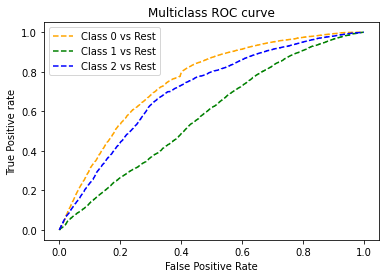

In [ ]:
# Evaluate the results
res=evaluate(multinomial,X_train_fs,y_train,X_test_fs,y_test,'Multinomial')
final_list.append(res)

###<font color='blue'> All the 3 models under naive bayes give results worse than the baseline models. Hence we reject these models.

##<font color='blue'> KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train_fs,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

----- Evaluation on train data -----

Confusion matrix 

[[31933  8364  3656]
 [ 1353 41091  1509]
 [  438  1009 42505]]

 Accuracy =  0.8761622351317326

 Recall =  0.8761622351317326

 Precision =  0.8842689399527868

 F1 score =  0.8734825322207435

 Roc_Auc score =  0.9806431735523868


----- Evaluation on test data -----

Confusion matrix 

[[ 7012  2769  1207]
 [  724  9568   696]
 [  184   439 10366]]

 Accuracy =  0.8174124070984378

 Recall =  0.8174124070984378

 Precision =  0.8263843498609131

 F1 score =  0.8127825469173479

 Roc_Auc score =  0.9314426457231922


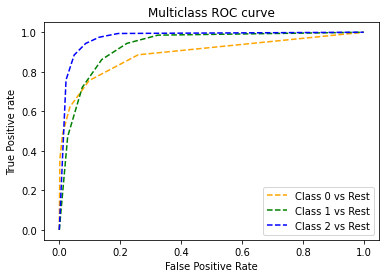

In [ ]:
# Evaluate the model
res=evaluate(classifier_knn,X_train_fs,y_train,X_test_fs,y_test,'KNN')
final_list.append(res)

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [ ]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_fs,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Best score is: ",knn_cv.best_score_)

Best score is:  0.848609871532752


In [ ]:
print("Best Parameters are: ",knn_cv.best_params_)

Best Parameters are:  {'n_neighbors': 1}


----- Evaluation on train data -----

Confusion matrix 

[[43886    55    12]
 [   58 43879    16]
 [   20    16 43916]]

 Accuracy =  0.9986576468625339

 Recall =  0.9986576468625339

 Precision =  0.9986577194569503

 F1 score =  0.9986576748032304

 Roc_Auc score =  0.9989932364625047


----- Evaluation on test data -----

Confusion matrix 

[[ 7911  2128   949]
 [  659 10004   325]
 [  206   265 10518]]

 Accuracy =  0.8625208554527529

 Recall =  0.8625208554527529

 Precision =  0.8667893679978302

 F1 score =  0.8598481675720544

 Roc_Auc score =  0.8968892880716779


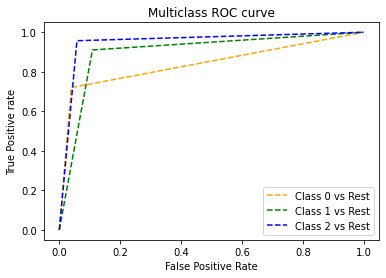

In [ ]:
# Evaluate results
res=evaluate(knn_cv,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_KNN')
final_list.append(res)

##<font color='blue'> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_fs,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

----- Evaluation on train data -----

Confusion matrix 

[[43751   157    45]
 [  527 43333    93]
 [   81   139 43732]]

 Accuracy =  0.9920975594958212

 Recall =  0.9920975594958212

 Precision =  0.9921211353381643

 F1 score =  0.9920975630382592

 Roc_Auc score =  0.9998249998650618


----- Evaluation on test data -----

Confusion matrix 

[[9718 1029  241]
 [1538 8634  816]
 [ 351  797 9841]]

 Accuracy =  0.8552404064917336

 Recall =  0.8552404064917336

 Precision =  0.8552325555276836

 F1 score =  0.8548532159336195

 Roc_Auc score =  0.9541749601871273


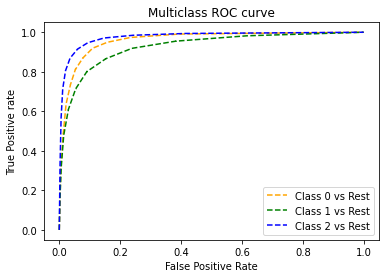

In [ ]:
# Evaluate results
res=evaluate(classifier_rf,X_train_fs,y_train,X_test_fs,y_test,'Random_Forest')
final_list.append(res)

In [ ]:
# Number of trees
n_estimators = [50,100]

# Maximum depth of trees
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train_fs,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   7.0s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   6.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   6.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   7.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   7.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   7.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   7.4s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#The best esitmators
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

----- Evaluation on train data -----

Confusion matrix 

[[33332  5701  4920]
 [12098 14156 17699]
 [ 6149  5539 32264]]

 Accuracy =  0.6048324712948778

 Recall =  0.6048324712948778

 Precision =  0.5971705200232622

 F1 score =  0.5863190150021275

 Roc_Auc score =  0.79256563607726


----- Evaluation on test data -----

Confusion matrix 

[[8366 1433 1189]
 [3059 3588 4341]
 [1575 1455 7959]]

 Accuracy =  0.6040649173365691

 Recall =  0.6040649173365691

 Precision =  0.595873321148293

 F1 score =  0.5862406363289512

 Roc_Auc score =  0.789837410968559


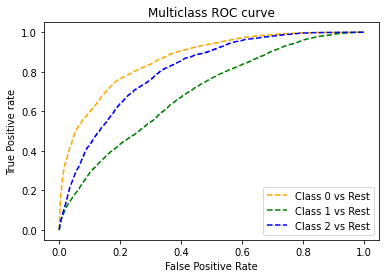

In [ ]:
# Evaluate results
res=evaluate(rf_optimal_model,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_Random_Forest')

#<font color='blue'> **Logistic Regression:**


----- Evaluation on train data -----

Confusion matrix 

[[30589  5985  7379]
 [13519  9816 20618]
 [ 7976  6050 29926]]

 Accuracy =  0.5333843983679413

 Recall =  0.5333843983679413

 Precision =  0.5177256717715847

 F1 score =  0.5076227722067866

 Roc_Auc score =  0.7188269255563767


----- Evaluation on test data -----

Confusion matrix 

[[7753 1466 1769]
 [3379 2483 5126]
 [2031 1505 7453]]

 Accuracy =  0.5365994236311239

 Recall =  0.5365994236311239

 Precision =  0.5212355723336554

 F1 score =  0.5107972772642483

 Roc_Auc score =  0.7194611007164667


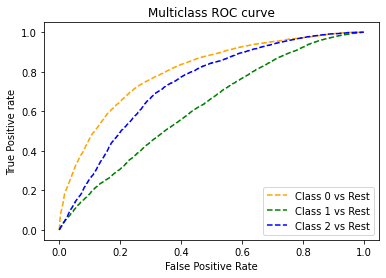

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit on the train set
logreg.fit(X_train_fs,y_train)

# Evaluate the results
res=evaluate(logreg,X_train_fs,y_train,X_test_fs,y_test,'Logistic_Regression')
final_list.append(res)

#<font color='blue'> **Catboost**

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train_fs,y_train,  
        eval_set=(X_test_fs,y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


----- Evaluation on train data -----

Confusion matrix 

[[42166  1520   267]
 [ 6643 26798 10512]
 [ 1312  5560 37080]]

 Accuracy =  0.8042287915788197

 Recall =  0.8042287915788197

 Precision =  0.802358480712594

 F1 score =  0.7976031862816721

 Roc_Auc score =  0.926122923485754


----- Evaluation on test data -----

Confusion matrix 

[[10419   489    80]
 [ 1667  6553  2768]
 [  353  1673  8963]]

 Accuracy =  0.7867435158501441

 Recall =  0.7867435158501441

 Precision =  0.7827987238605366

 F1 score =  0.7802976638437286

 Roc_Auc score =  0.9159640014676818


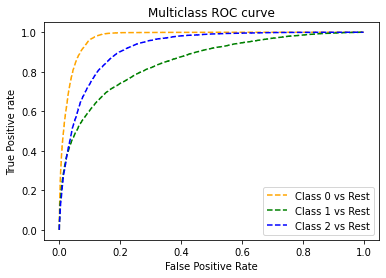

In [ ]:
# Evaluate the results
res=evaluate(clf2,X_train_fs,y_train,X_test_fs,y_test,'CatBoost')
final_list.append(res)

In [ ]:
All_model=pd.DataFrame(final_list)

In [ ]:
All_model

,MODEL_NAME,F1_SCORE_Train,PRECISION_Train,RECALL__Train,ACCURACY_Train,ROC_AUC_Train,F1_SCORE_Test,PRECISION_Test,RECALL__Test,ACCURACY_Test,ROC_AUC_Test
0,Decision_Tree_On_Under_Sampled_data,0.999122,0.999123,0.999122,0.999122,0.999998,0.487829,0.488626,0.487360,0.487360,0.615470
1,SVM_On_Under_Sampled_Data,0.505861,0.523580,0.536435,0.536435,0.722464,0.482963,0.505824,0.511938,0.511938,0.702622
2,Hypertuned_SVM_On_Under_Sampled_data,0.543274,0.554801,0.564355,0.564355,0.745410,0.508849,0.517580,0.527388,0.527388,0.706608
3,Decision_Tree,0.998658,0.998661,0.998658,0.998658,0.999998,0.796616,0.796767,0.796693,0.796693,0.848036
4,XGBoost,0.914399,0.917730,0.915667,0.915667,0.984400,0.839845,0.842230,0.842773,0.842773,0.948466
5,Gaussian,0.400251,0.451554,0.496314,0.496314,0.683632,0.402857,0.458399,0.499439,0.499439,0.685094
6,Bernoulli,0.391837,0.523791,0.488791,0.488791,0.639929,0.395480,0.534133,0.492947,0.492947,0.641264
7,Multinomial,0.390475,0.325475,0.488321,0.488321,0.678233,0.393564,0.328124,0.492280,0.492280,0.680555
8,KNN,0.873483,0.884269,0.876162,0.876162,0.980643,0.812783,0.826384,0.817412,0.817412,0.931443
9,Hyper_Tuned_KNN,0.998658,0.998658,0.998658,0.998658,0.998993,0.859848,0.866789,0.862521,0.862521,0.896889


<Figure size 1440x720 with 0 Axes>

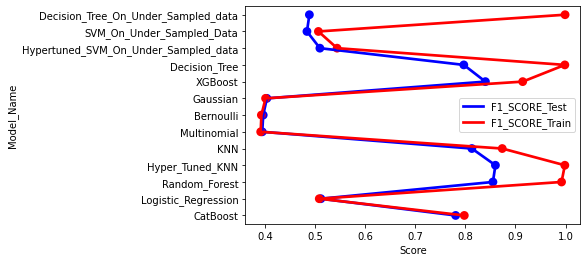

In [ ]:
ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["F1_SCORE_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2,labels=('F1_SCORE_Test'))
ax = sns.pointplot(x=All_model["F1_SCORE_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7,labels=('F1_SCORE_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["F1_SCORE_Test","F1_SCORE_Train"])


# visulaizing illustration
plt.show()

<Figure size 1440x720 with 0 Axes>

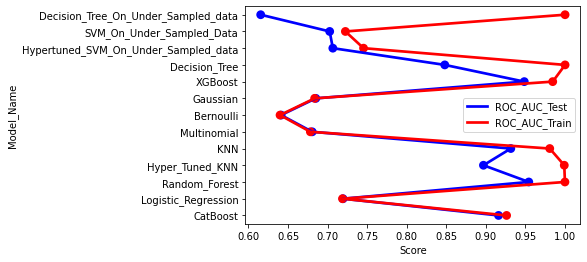

In [ ]:
plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["ROC_AUC_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2)
ax = sns.pointplot(x=All_model["ROC_AUC_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7)
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["ROC_AUC_Test","ROC_AUC_Train"])
# visulaizing illustration
plt.show()

###<font color='blue'> From the above plots we can observe that <b>XG-Boost</b> outperformed all the other models both for train as well as test. 


##<font color='blue'>Conclusion:

* <font color='blue'>In EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

* <font color='blue'>It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

* <font color='blue'>As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !

* <font color='blue'>For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked way better than undersampling as the latter resulted in a lot of loss of information.

* <font color='blue'>Based on the metrics, XG Boost Classifier worked the best giving a train score of 89% and test score of 81%  for F1 score.